# Introduction to Python: basic elements I (An exercise)

In [1]:
import os
os.chdir("/home/gf/src/Python/Python-in-the-lab/Bk") # Insert here your directory. Windows should have "\" instead of "/"
os.path.abspath(".")

'/home/gf/src/Python/Python-in-the-lab/Bk'

Exercise
=========
The three files F64ac_freq_sp.dat are the power spectra $S$ of magnetic noise signals taken at three different frequencies $f_H$ of an applied magnetic field .

I remember that the *amplitude* of the power spectra rescales, i.e. it is proportional, with the frequency $f_H$, but I do not remember if it is directly or inversely proportional.

In other words, if $S / f_H$ or $S f_H$ shows a good collapse of the data.

Would you please check it for me?

ps. Or are they already rescaled?

In [2]:
import glob
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
filenames = sorted(glob.glob("F64ac_0.0?_sp.dat"))
filenames

['F64ac_0.01_sp.dat', 'F64ac_0.02_sp.dat', 'F64ac_0.03_sp.dat']

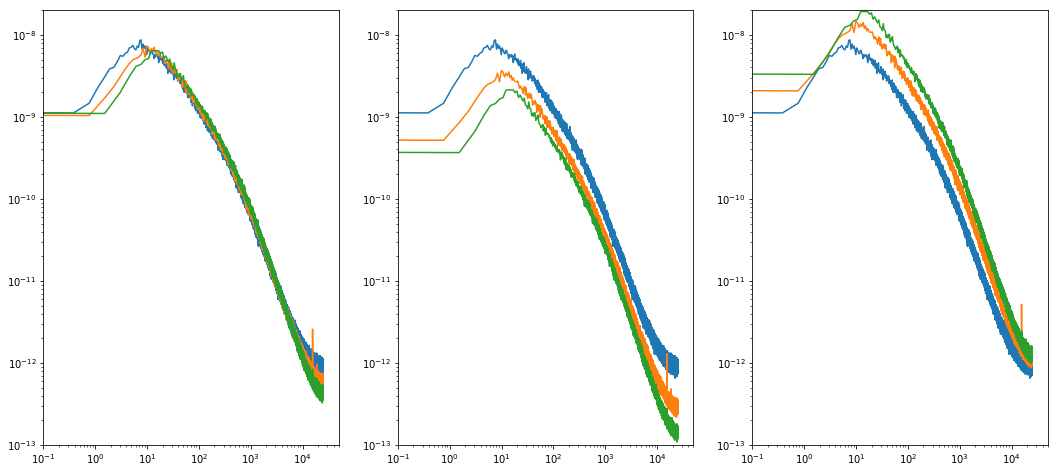

In [3]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axs = [ax1, ax2, ax3]
for filename in filenames:
    f, S = np.loadtxt(filename, unpack=True)
    material, freq, something = filename.split("_")
    f_H = float(freq)
    ax1.loglog(f, S)
    ax2.loglog(f, S/f_H/100)
    ax3.loglog(f, S*f_H*100)
for ax in axs:
    ax.axis((.1,5e4,1e-13,2e-8))

Sincerely, this does not look very pythonic. I understand, it works... but it is very clumsy!

Something better? (Hint: explore matplotlib website)

(0.1, 50000.0, 1e-13, 2e-08)

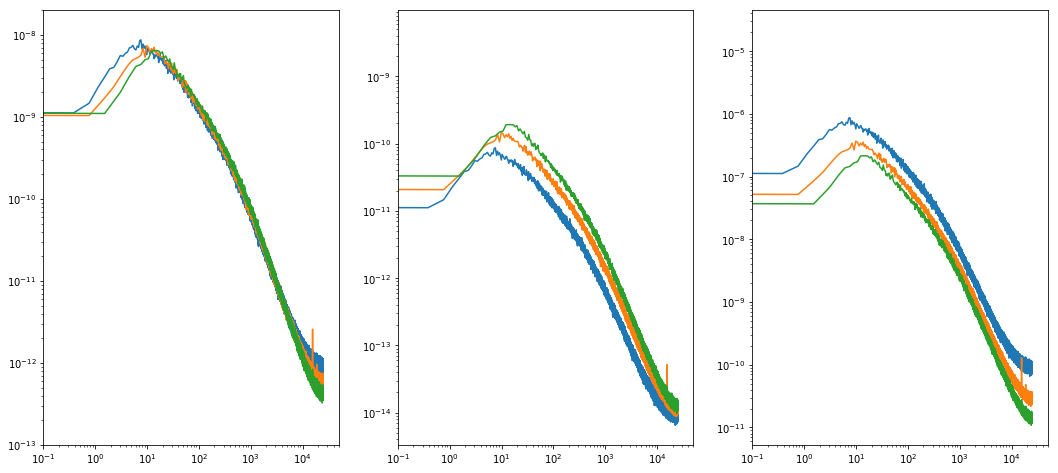

In [4]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(18,8))
for filename in filenames:
    fr, Sp = np.loadtxt(filename, unpack=True)
    material, freq, something = filename.split("_")
    f_H = float(freq)
    factors = [1, f_H, 1/f_H]
    for i, ax in enumerate(axs):
        factor = factors[i]
        ax.loglog(fr, Sp*factor)
axs[0].axis((.1,5e4,1e-13,2e-8))

[(1, <matplotlib.axes._subplots.AxesSubplot at 0x7fedf90b0fd0>),
 (0.03, <matplotlib.axes._subplots.AxesSubplot at 0x7fedf8f30b38>),
 (33.333333333333336,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fedf8ed9c18>)]

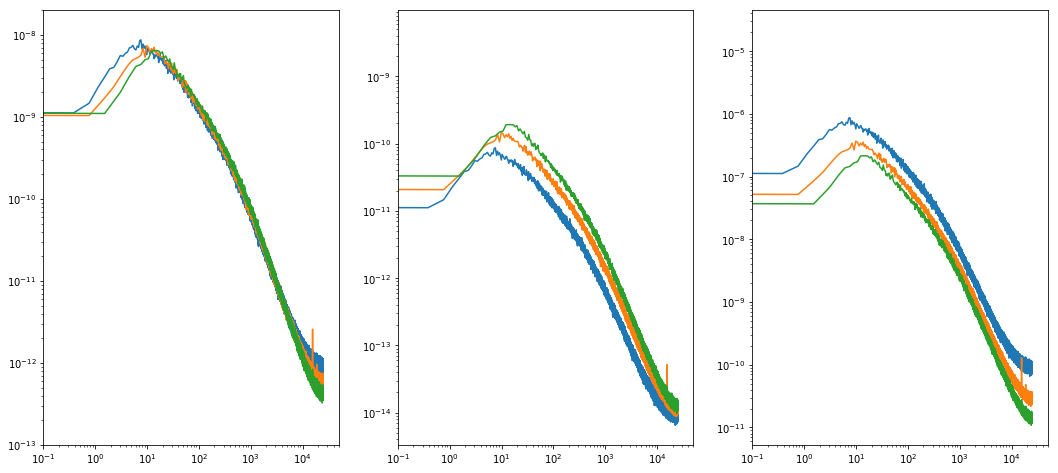

In [5]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(18,8))
for filename in filenames:
    fr, Sp = np.loadtxt(filename, unpack=True)
    material, freq, something = filename.split("_")
    f_H = float(freq)
    factors = [1, f_H, 1/f_H]
    for factor, ax in zip(factors,axs):
        ax.loglog(fr, Sp*factor)
axs[0].axis((.1,5e4,1e-13,2e-8))
list(zip(factors,axs))